## Churn Modelling

## 1. Customer Demographics: 
   - What is the distribution of customers across different age groups?
   - Analyze the gender distribution of customers.

## 2. Churn Analysis: 
   - What percentage of customers have churned?
   - What are the main reasons for customer churn?
   - Identify any patterns or trends among customers who have churned.

## 3. Product Usage: 
   - What are the most commonly used products or services?
   - Analyze the usage patterns of different customer segments.

## 4. Financial Analysis: 
   - What is the average account balance of customers?
   - Compare the financial characteristics of churned vs. non-churned customers.

## 5. Predictive Modeling: 
   - Which factors are the most significant predictors of customer churn?
   - Develop a predictive model to identify at-risk customers.


In [1]:
# Importing Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier

In [2]:
# reading the excel file
df = pd.read_excel("P3- Churn-Modelling Data.xlsx", engine = 'openpyxl')

In [3]:
# printing data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# printing the shape of the data
df.shape

(10000, 14)

**There 10000 rows and 14 columns in the data**

In [5]:
# making a copy of the data
data = df.copy()

# 1. Customer Demographics

### What is the distribution of customers across different age groups?

In [6]:
# for the distribution of customers across different age groups let's make the age groups

bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
data['Age-group'] = pd.cut(data['Age'], bins = bins, labels = labels)

In [7]:
# counting the value of each age groups

age_groups = data['Age-group'].value_counts()

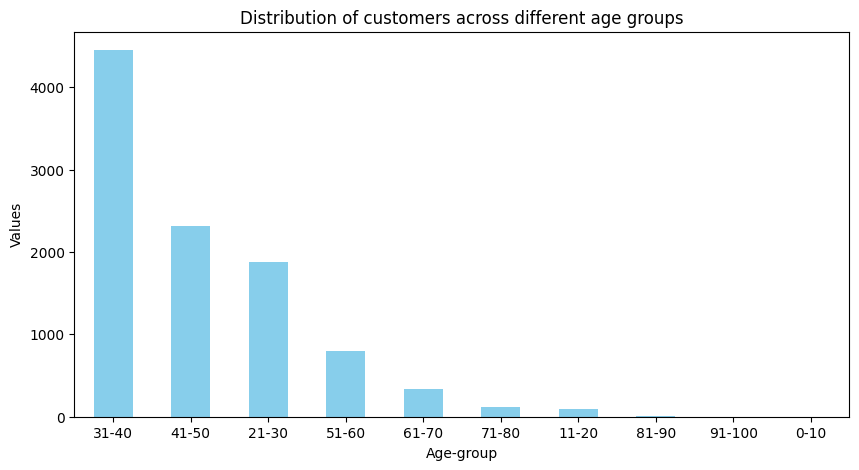

In [8]:
# distribution of customers

plt.figure(figsize = (10,5))
age_groups.plot(kind = 'bar', color = 'skyblue')
plt.title("Distribution of customers across different age groups")
plt.xlabel('Age-group')
plt.ylabel('Values')
plt.xticks(rotation = 0)
plt.show()

In [9]:
print(age_groups.reset_index())

  Age-group  count
0     31-40   4451
1     41-50   2320
2     21-30   1879
3     51-60    797
4     61-70    331
5     71-80    121
6     11-20     89
7     81-90     10
8    91-100      2
9      0-10      0


- The customer between the age-group 31-40 are more which is 4451
- No customers between the age 0-10
- Very less customers are in between 91-100
- The customers between the age 21-30 are 1879

### Analyze the gender distribution of customers.

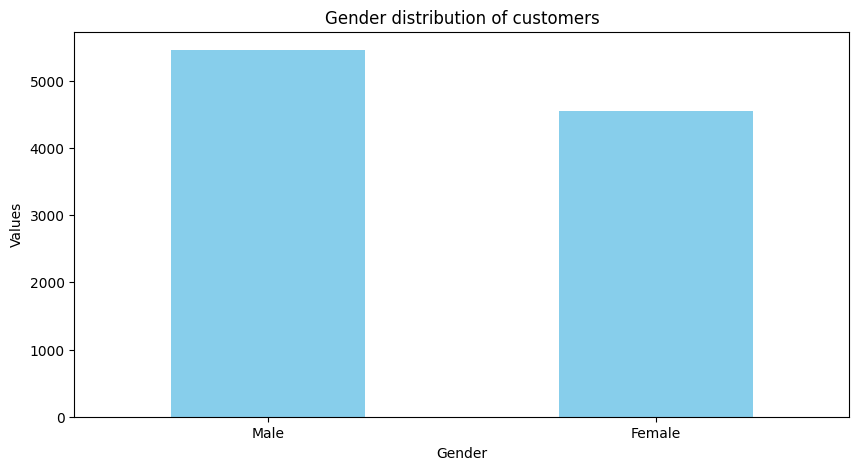

   Gender  count
0    Male   5457
1  Female   4543


In [10]:
# gender distribution of customers

gender = data['Gender'].value_counts()

plt.figure(figsize = (10,5))
gender.plot(kind = 'bar', color = 'skyblue')
plt.title("Gender distribution of customers")
plt.xlabel('Gender')
plt.ylabel('Values')
plt.xticks(rotation = 0)
plt.show()
print(gender.reset_index())

**Male customers are more than female customers**

# 2.  Churn Analysis: 

### What percentage of customers have churned?

In [11]:
# total number of customers
total_customers = data.shape[0]

# customers who have churned
churned_customers = data['churned'].sum()

# percentage of customers who have churned
percentage = (churned_customers/total_customers)*100
print(f"Precentage of customers who have churned: {format(percentage, '.2f')}%")

Precentage of customers who have churned: 20.37%


**20.37% of customers have churned**

### What are the main reasons for customer churn?

In [12]:
churned_stats = df[df['churned'] == 1].describe()
non_churned_stats = df[df['churned'] == 0].describe()

In [13]:
churned_stats

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
count,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,2866.855245,7.269262e+04,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,2419.000000,1.562736e+07,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,4871.000000,1.568896e+07,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,7404.000000,1.575309e+07,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,9999.000000,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [14]:
non_churned_stats

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
count,7963.000000,7.963000e+03,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,2891.682053,7.174423e+04,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,2.000000,1.556570e+07,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,2526.500000,1.562882e+07,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,5042.000000,1.569154e+07,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,7525.500000,1.575335e+07,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


- **31-40 age-group has the highest churn rate, possibly due to career transitions, family growth.**
- **Germany has the highest churn rate despite high balances and salaries, the high churn rate due to dissatisfaction with -services or better competitor offers.**
- **Churn rate for female customers is high, this can be due to unmet expectations or lack of targeted services.** 
- **High product usage may lead to churn if needs are not met.**
- **In the age-group, financial flexibility may lead to switching banks for better terms or rewards.**
- **Age 91-100 are less likely to churn due to established trust and satisfaction.**
- **Higher product usage, possibly leading to higher susceptibility to churn if better alternatives are found.**


### Identify any patterns or trends among customers who have churned.

In [15]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,Age-group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50


In [16]:
# credit score of customers who have churned or not churned

credit_churned = data[data['churned']==1]['CreditScore']
credit_unchurned = data[data['churned']==0]['CreditScore']

In [17]:
# Count the number of products used by customers

product_usage_counts = df['NumOfProducts'].value_counts()

# Count the number of customers with credit cards
credit_card_usage_counts = df['HasCrCard'].value_counts()

print("Product Usage Counts:\n", product_usage_counts)
print("\nCredit Card Usage Counts:\n", credit_card_usage_counts)

Product Usage Counts:
 NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Credit Card Usage Counts:
 HasCrCard
1    7055
0    2945
Name: count, dtype: int64


- 7055 customers have own credit card.
- 2946 customers have not own credit card
- Majority of Customers Use 1 or 2 Products
- Few Customers Use More Than 2 Products

### Finding patterns based on columns 

In [18]:
def find(column):
    column_group_usage = data.groupby(column).agg({
        'NumOfProducts': 'sum',
        'HasCrCard': 'sum',
        'Balance': 'mean',
        'EstimatedSalary': 'mean',
        'churned': 'sum'
    }).reset_index() 
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    col = ['NumOfProducts', 'churned', 'HasCrCard']
    titles = ['Number of Products Used by Age-group', 'Number of Customer Churned by Age-group', 'Credit Card Usage by Age-group']
    for i, feature in enumerate(col):
        sns.barplot(x=column, y= col[i], data=column_group_usage, color='skyblue', ax=axes[i])
        axes[i].set_title(titles[i])
        axes[i].set_ylabel(feature)
    plt.tight_layout()
    plt.show()
    return column_group_usage

#### Age Group

C:\Users\Aditya Shakya\AppData\Local\Temp\ipykernel_8004\4261246458.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  column_group_usage = data.groupby(column).agg({


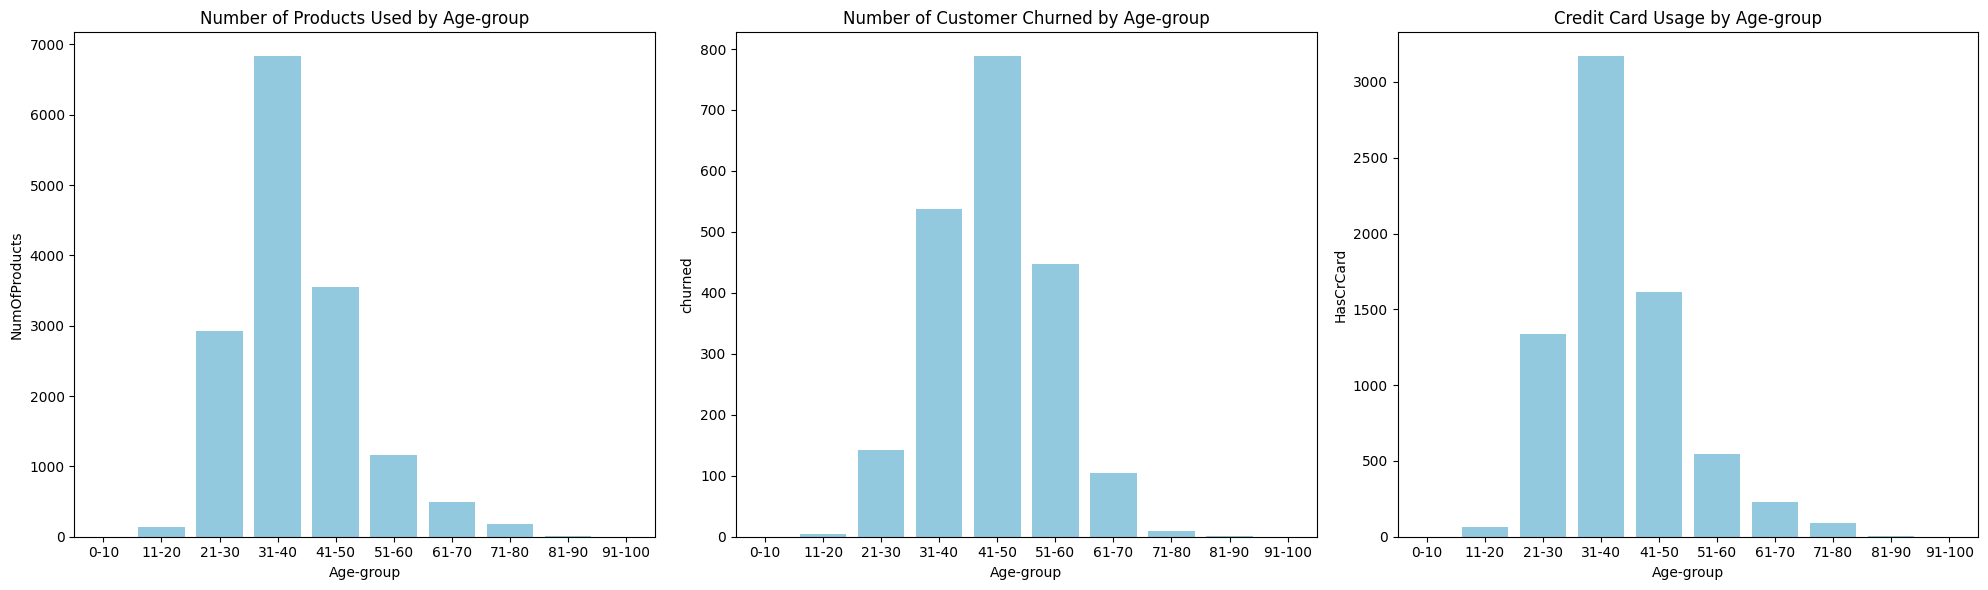

,Age-group,NumOfProducts,HasCrCard,Balance,EstimatedSalary,churned
0,0-10,0,0,NaN,NaN,0
1,11-20,132,62,75133.200225,94598.819775,5
2,21-30,2929,1338,73107.138281,101397.458733,143
3,31-40,6829,3169,75583.362420,99359.311804,538
4,41-50,3545,1612,79122.193461,102047.043353,788
5,51-60,1167,546,82401.663162,97150.934015,448
6,61-70,499,232,78774.506073,97545.985196,104
7,71-80,182,88,69397.621157,98893.957355,10
8,81-90,16,7,42550.151000,104665.630000,1
9,91-100,3,1,123794.775000,115000.410000,0


In [19]:
# Group by Age-group and compute number of products used and credit card usage
age_group_usage = find('Age-group')
age_group_usage

- **More number of products are used by customers between the 21-30 age group.**
- **The customers with age group 31-40 has more number of credit cards.**
- **Customers with age-group 91-100 have highest mean bank balance which is total of 123,794.7750**
- **Customers in the age group 31-40 have the highest churn rate.**
- **The mean estimate salary of age-group 91-100 is high.**
- **Those who are in the age-group 0-10 have no card, no balance, no estimated salary.**


#### Geography

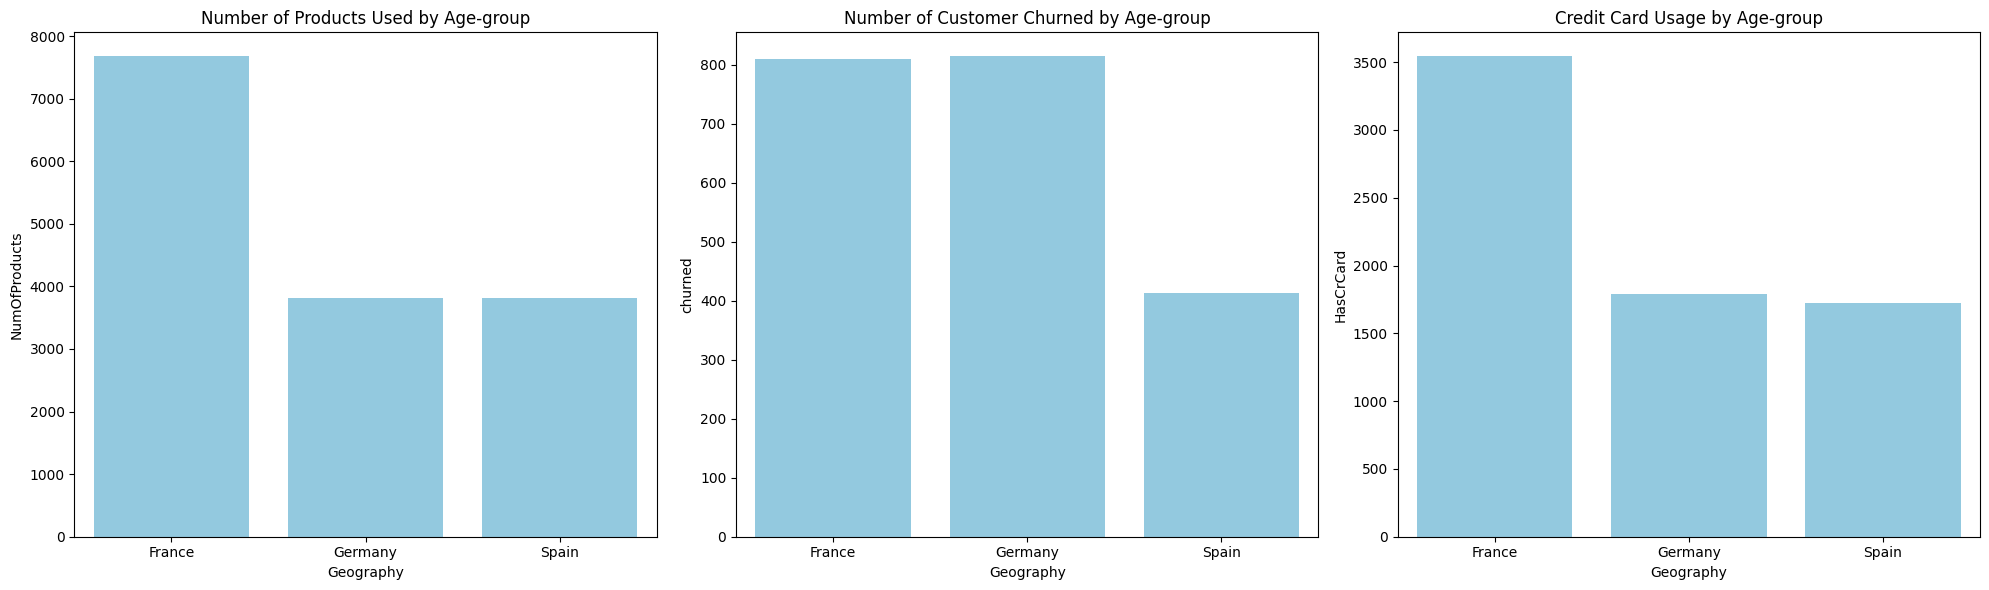

,Geography,NumOfProducts,HasCrCard,Balance,EstimatedSalary,churned
0,France,7676,3543,62092.636516,99899.180814,810
1,Germany,3813,1791,119730.116134,101113.435102,814
2,Spain,3813,1721,61818.147763,99440.572281,413


In [20]:
# Group by Geography and compute average number of products used and credit card usage
geography_usage = find('Geography')

geography_usage

- **Customer who live in Germany has the highest churn rate.**
- **Number of products use by more, who live in France.**
- **Spain has the lowest churn rate.**
- **Germany has the highest mean balance and estimated salary.**


#### Gender

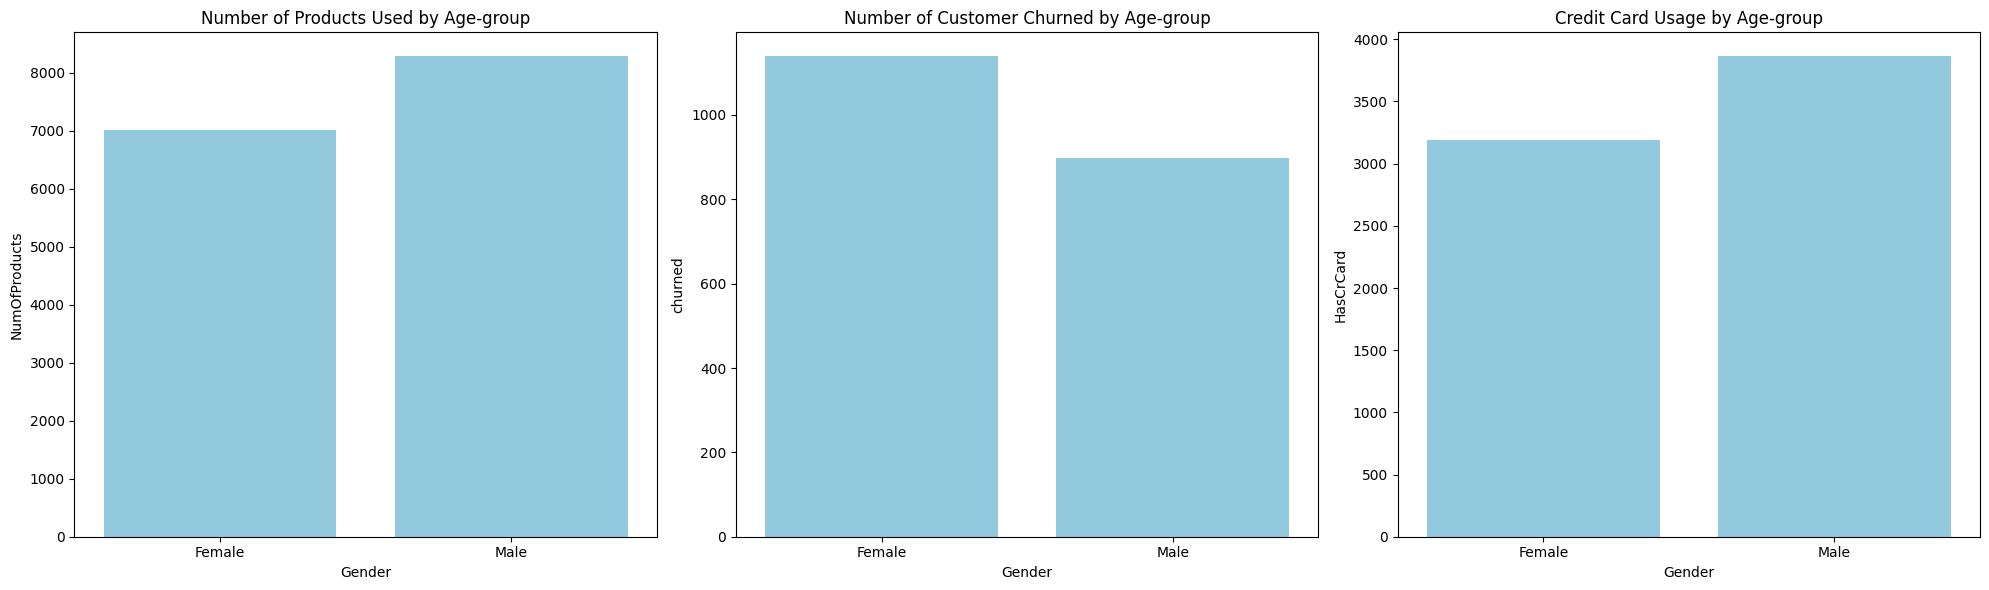

,Gender,NumOfProducts,HasCrCard,Balance,EstimatedSalary,churned
0,Female,7015,3192,75659.369139,100601.541382,1139
1,Male,8287,3863,77173.974506,99664.576931,898


In [21]:
# Group by Gender and compute average number of products used and credit card usage
gender_usage = find('Gender')

gender_usage

- **The churn rate by the female customers is high.**
- **Number of products used by male customers is more.**
- **Male customers has more number of credit cards.**
- **Mean balance of male is high.**
- **Mean estimated salary of female is high.**

# 3.  Product Usage: 


### What are the most commonly used products or services?

In [22]:
# Count the number of each product used
product_counts = data['NumOfProducts'].value_counts()

print("Most Commonly Used Products or Services:")
print(product_counts)

Most Commonly Used Products or Services:
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


### Analyze the usage patterns of different customer segments.

In [23]:
# Group by Age-group and compute average number of products used
age_group_usage['NumOfProducts']

0       0
1     132
2    2929
3    6829
4    3545
5    1167
6     499
7     182
8      16
9       3
Name: NumOfProducts, dtype: int64

In [24]:
geography_usage['NumOfProducts']

0    7676
1    3813
2    3813
Name: NumOfProducts, dtype: int64

In [25]:
gender_usage['NumOfProducts']

0    7015
1    8287
Name: NumOfProducts, dtype: int64

# 4.  Financial Analysis: 


### What is the average account balance of customers?

In [56]:
balance = data['Balance'].mean()
print(format(balance, '.2f'))

76485.89


In [59]:
churned_stats = df[df['churned'] == 1][['CreditScore', 'Balance', 'EstimatedSalary']].describe()
churned_stats = churned_stats.reset_index()

In [60]:
non_churned_stats = df[df['churned'] == 0][['CreditScore', 'Balance', 'EstimatedSalary']].describe()
non_churned_stats = non_churned_stats.reset_index()

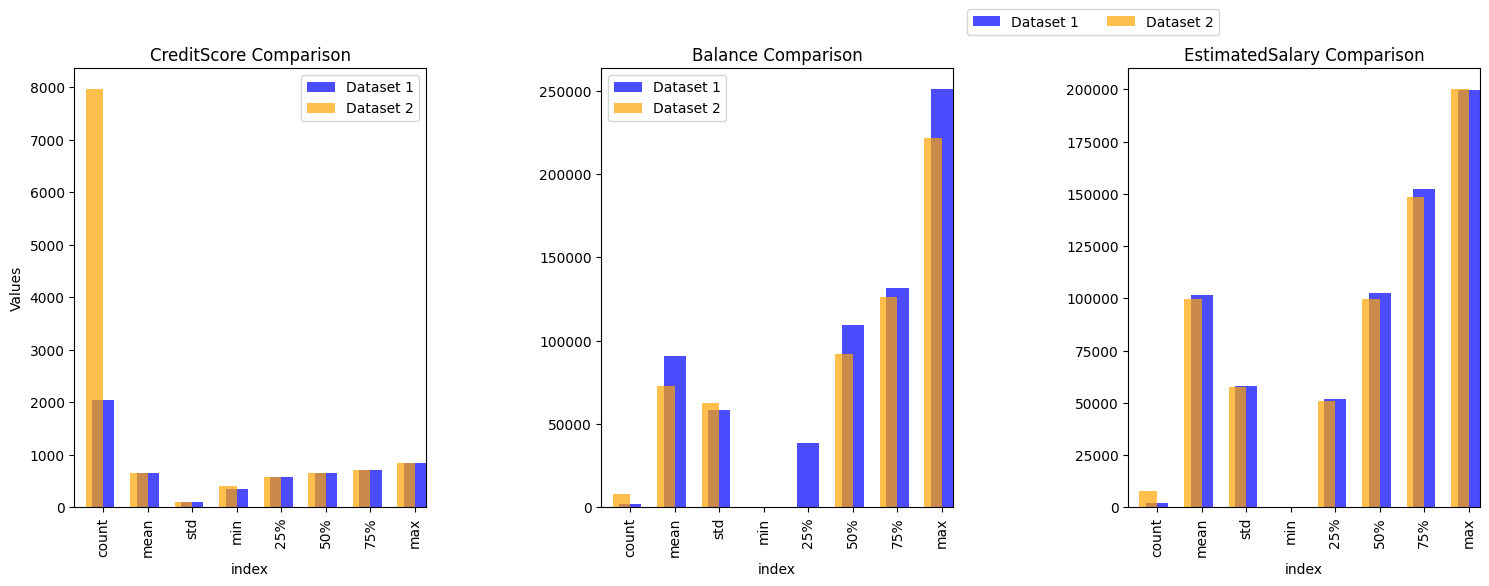

In [61]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Plot for CreditScore
churned_stats.plot(x='index', y='CreditScore', kind='bar', ax=axes[0], color='blue', alpha=0.7, label='Dataset 1')
non_churned_stats.plot(x='index', y='CreditScore', kind='bar', ax=axes[0], color='orange', alpha=0.7, label='Dataset 2', width=0.4, position=1)
axes[0].set_title('CreditScore Comparison')
axes[0].set_ylabel('Values')

# Plot for Balance
churned_stats.plot(x='index', y='Balance', kind='bar', ax=axes[1], color='blue', alpha=0.7, label='Dataset 1')
non_churned_stats.plot(x='index', y='Balance', kind='bar', ax=axes[1], color='orange', alpha=0.7, label='Dataset 2', width=0.4, position=1)
axes[1].set_title('Balance Comparison')

# Plot for EstimatedSalary
churned_stats.plot(x='index', y='EstimatedSalary', kind='bar', ax=axes[2], color='blue', alpha=0.7, label='Dataset 1')
non_churned_stats.plot(x='index', y='EstimatedSalary', kind='bar', ax=axes[2], color='orange', alpha=0.7, label='Dataset 2', width=0.4, position=1)
axes[2].set_title('EstimatedSalary Comparison')

# Set a common legend
plt.legend(['Dataset 1', 'Dataset 2'], loc='upper center', bbox_to_anchor=(-0.1, 1.15), ncol=2)
plt.tight_layout()
plt.show()

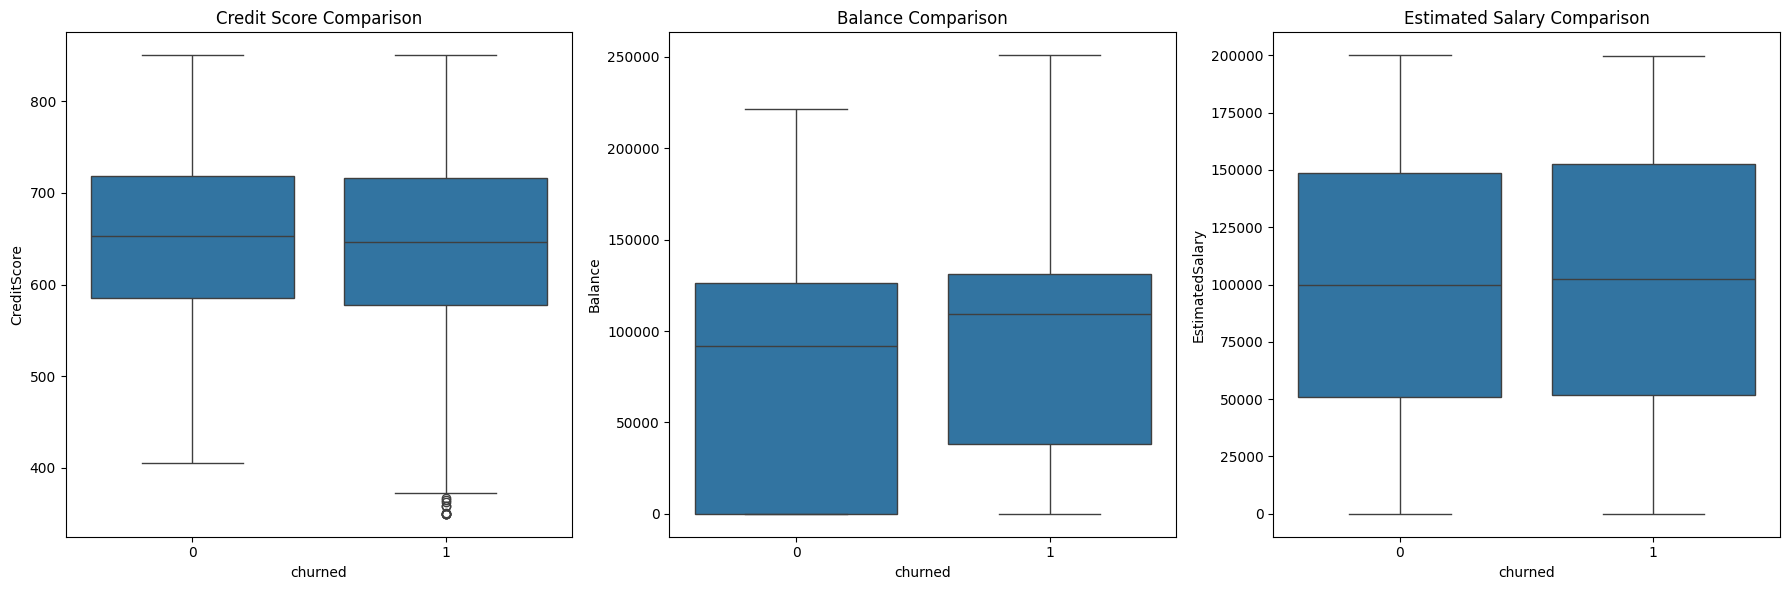

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for CreditScore
sns.boxplot(x='churned', y='CreditScore', data=df, ax=axes[0])
axes[0].set_title('Credit Score Comparison')

# Boxplot for Balance
sns.boxplot(x='churned', y='Balance', data=df, ax=axes[1])
axes[1].set_title('Balance Comparison')

# Boxplot for EstimatedSalary
sns.boxplot(x='churned', y='EstimatedSalary', data=df, ax=axes[2])
axes[2].set_title('Estimated Salary Comparison')

# Adjust layout
plt.tight_layout()
plt.show()

# 5.  Predictive Modeling: 
   - Which factors are the most significant predictors of customer churn?
   - Develop a predictive model to identify at-risk customers.

### Which factors are the most significant predictors of customer churn?

In [30]:
# Prepare the data for modeling
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['churned']



In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:

# Train a RandomForest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Age,0.248300
EstimatedSalary,0.167262
CreditScore,0.161797
Balance,0.148759
NumOfProducts,0.131229
Tenure,0.083798
IsActiveMember,0.042137
HasCrCard,0.016718


**The features can be selected as Age, EstimatedSalary, CreditScore, Balance, NumOfProducts**

In [34]:
selected_features = df[['Age','EstimatedSalary','CreditScore','Balance',"NumOfProducts"]]

In [35]:
df['churned'].value_counts()

churned
0    7963
1    2037
Name: count, dtype: int64

**Since the classes are imbalanced, so to balance the class, apply smote technique**

In [36]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [37]:
# Train a RandomForest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [38]:
y_pred = model.predict(X_test)

In [39]:
accuracy_score(y_pred, y_test)

0.8015

In [40]:
precision_score(y_pred, y_test)

0.6157760814249363

In [41]:
recall_score(y_pred, y_test)

0.4959016393442623

In [42]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_smote, y_train_smote)

C:\Users\Aditya Shakya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred_lr=  model_lr.predict(X_test)


In [44]:
# accuracy_score
accuracy_score(y_test,y_pred_lr)

0.6445

In [45]:
# precision
precision_score(y_test,y_pred_lr)

0.3041871921182266

In [46]:
# recall
recall_score(y_test,y_pred_lr)

0.628498727735369

In [47]:
# MLP
model_mlp = MLPClassifier(hidden_layer_sizes=7,)

In [48]:
model_mlp.fit(X_train_smote, y_train_smote)

MLPClassifier(hidden_layer_sizes=7)

In [49]:
y_pred_mlp = model_mlp.predict(X_test)

In [50]:
# accuracy
accuracy_score(y_pred_mlp,y_test)

0.586

In [62]:
precision_score(y_pred_mlp, y_test)

0.5597964376590331

In [63]:
recall_score(y_pred_mlp, y_test)

0.25142857142857145

In [65]:
models = {
    'models': ['Random Forest', 'Logistic Regression', 'MLP'],
    'Accuracy%' : [80,64,58],
    'Precision%' : [61, 30, 55.9],
    'Recall%': [49.5, 30.1, 25.1]
}
model_data = pd.DataFrame(models)
model_data

,models,Accuracy%,Precision%,Recall%
0,Random Forest,80,61.0,49.5
1,Logistic Regression,64,30.0,30.1
2,MLP,58,55.9,25.1
